https://github.com/ankushdata/Data-Preprocessing-in-Python-
additional resource: go to the dates in the above rep and understand

In [1]:
import numpy as np
import pandas as pd
from io import StringIO

In [5]:
# create CSV (comma-separated values) dataset
csv_data = '''A, B, C, D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,, 8.0
10.0, 11.0, 12.0,
,,,'''

# convert to data frame
df = pd.read_csv(StringIO(csv_data))

# we can see which values are missing in the data frame. for larger dataset,
# we can use an isnull method.
df.isnull().sum()

# to see the values of the df data frame, use .values function
print("df.values:",df.values)


df.values: [[ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]
 [nan nan nan nan]]


"""
Eliminating samples or features with missing values.
"""

In [6]:
# eliminating rows with missing data
print(df.dropna())

# eliminating columns with missing data
print(df.dropna(axis=1))

     A    B    C    D
0  1.0  2.0  3.0  4.0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [7]:
# eliminating columns where all values as NaN
print(df.dropna(how='all'))

# eliminating rows that have atleast 4 non-NaN values
print(df.dropna(thresh=4))

# only drop rows where NaN appears in specific columns
# for some reason, this command is not working. Any column name other than A
# gives and error. WHY???
df.dropna(subset=['A'])

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
     A    B    C    D
0  1.0  2.0  3.0  4.0


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
"""
Imputing missing values. strategy can be mean, median and most_frequent.
"""
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
print(imputed_data)

In [9]:
"""
Handling categorical data. It can be nominal features which don't imply any
order in the context or ordinal features that can be ordered and sorted.
"""
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'],
            ['red', 'L', 13.5, 'class2'],
            ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']   
print(df)         

# Let us map the ordinal features via the relationship, XL = L + 1 = M + 2
size_mapping = {
                'XL': 3,
                'L': 2,
                'M': 1}
df['size'] = df['size'].map(size_mapping)
print(df)

# in order to transform the integer values back to the original mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)
print(df)

"""
Encoding class label: Though many of the estimators convert class labels to 
integers internally, like with the iris dataset, 
"""
class_mapping = {label:idx for idx, label in 
                 enumerate(np.unique(df['classlabel']))}
print(class_mapping)                 

# Encoding class labels via map()
#df['classlabel'] = df['classlabel'].map(class_mapping)
#df['size'] = df['size'].map(size_mapping)
#print(df)

#inv_class_mapping = {v:k for k, v in class_mapping.items()}
#df['classlabel'] = df['classlabel'].map(inv_class_mapping)
#print(df)

# LabelEncoder from the preprocessing module can do the equivalent job
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
print(y)

# We can transform the integer class labels back
print(class_le.inverse_transform(y))

"""
Performing one-hot encoding on nominal features. Ordinal size features can be
converted into integers. For nominal values, however, attaching integer values
can lead to bad performance of the algorithm, since it thinks that integers are
ordered. The workaround is to use a technique called one-hot encoding.
"""
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)
 


   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1
   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1
   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1
{'class1': 0, 'class2': 1}
[0 1 0]
['class1' 'class2' 'class1']
[[1 'M' 10.1]
 [2 'L' 13.5]
 [0 'XL' 15.3]]


In [ ]:
from sklearn.preprocessing import LabelBinarizer
cat_features = ['color', 'director_name', 'actor_2_name']
encoder = LabelBinarizer()
new_cat_features = encoder.fit_transform(cat_features)
new_cat_features

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
cat_features = ['color', 'director_name', 'actor_2_name', 'color']
encoder = LabelBinarizer(sparse_output=True)
new_cat_features = encoder.fit_transform(cat_features)
print(new_cat_features)

  (0, 1)	1
  (1, 2)	1
  (2, 0)	1
  (3, 1)	1


Note that for multi array like [a,b],[c,d] only onehotencoding can be done

In [ ]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 
'warm', 'hot']
values = array(data)
print ("Data: ", values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print ("Label Encoder:" ,integer_encoded)

# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print ("OneHot Encoder:", onehot_encoded)

#Binary encode
lb = LabelBinarizer()
print ("Label Binarizer:", lb.fit_transform(values))

Data:  ['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
Label Encoder: [0 0 2 0 1 1 2 0 2 1]
OneHot Encoder: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Label Binarizer: [[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

X = np.array([['apple', 'red', 1, 'round', 0],
              ['orange', 'orange', 2, 'round', 0.1],
              ['bannana', 'yellow', 2, 'long', 0],
              ['apple', 'green', 1, 'round', 0.2]])
ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0, 1, 3]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
print(ct.fit_transform(X)) # Notice the output is a string

[['1.0' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '1' '0']
 ['0.0' '0.0' '1.0' '0.0' '1.0' '0.0' '0.0' '0.0' '1.0' '2' '0.1']
 ['0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '1.0' '1.0' '0.0' '2' '0']
 ['1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '1.0' '1' '0.2']]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

X = np.array([['apple', 'red', 1, 'round', 0],
              ['orange', 'orange', 2, 'round', 0.1],
              ['bannana', 'yellow', 2, 'long', 0],
              ['apple', 'green', 1, 'round', 0.2]])
ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
print(ct.fit_transform(X)) # Notice the output is a string

[['1.0' '0.0' '0.0' 'red' '1' 'round' '0']
 ['0.0' '0.0' '1.0' 'orange' '2' 'round' '0.1']
 ['0.0' '1.0' '0.0' 'yellow' '2' 'long' '0']
 ['1.0' '0.0' '0.0' 'green' '1' 'round' '0.2']]


# **Wine Dataset**

In [ ]:
"""
Splitting datasets into test and train groups. Having dealt with the Iris data-
set, we now turn our attention to the wine data set. We will preprocess the 
dataset followed by splitting it into test and train subsets. 
"""
# download data from repository
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-\
databases/wine/wine.data', header=None)

# name columns
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alkanalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavonoids',
                   'Nonflavonoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

To find how many unique attributes are there given a column

In [ ]:
# look at all possible class labels - 3 possibilities                   
print('Class labels', np.unique(df_wine['Class label']))


Class labels [1 2 3]


In [ ]:
# check for na values - no missing values
print(df_wine.isnull().sum())

# Split wine data into test and train sets
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alkanalinity of ash             0
Magnesium                       0
Total phenols                   0
Flavonoids                      0
Nonflavonoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [ ]:
# standardize dataset using the MinMaxScaler        
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)     

# standardize dataset using the StandardScaler
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler() 
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 

"""
L1 vs L2 regularization: So far we have seen the usage of L2 regularization in
the joint minimization of cost function and weight magnitude penalty. This works
well to regularize the data and prevent overfitting by minimzing the weight
magnitude. Another option is the L1 regularization, which leads to sparse 
weight vectors, i.e. most entries are 0. This can be extremely useful for 
feature selection. Next up, is some code for Raschka that shows these points.
"""

In [ ]:
from sklearn.linear_model import LogisticRegression

# logistic regression using L1 regularization
lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

# Since the test and training scores are close, there is no indication of 
# overfitting. Find the weight coefficients. Remember One-versus-Rest is used.
print(lr.coef_)


Training accuracy:  0.9838709677419355
Test accuracy:  0.9814814814814815
[[ 0.28035734  0.          0.         -0.02800405  0.          0.
   0.71015251  0.          0.          0.          0.          0.
   1.23590463]
 [-0.64404283 -0.06875143 -0.05720255  0.          0.          0.
   0.          0.          0.         -0.92676346  0.06017645  0.
  -0.37107245]
 [ 0.          0.06143918  0.          0.          0.          0.
  -0.63682252  0.          0.          0.49844395 -0.35812059 -0.57036195
   0.        ]]


Plotting the weight components for each feature as a function of regularizat-
ion strength. When a weight vector is 0, it tells us that the feature is not
important. There is a caveat, however. If two features are correlated, and 
yet important, one of the weights could end up being zero. So, need to watch
out for that.


In [ ]:
# https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

13
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


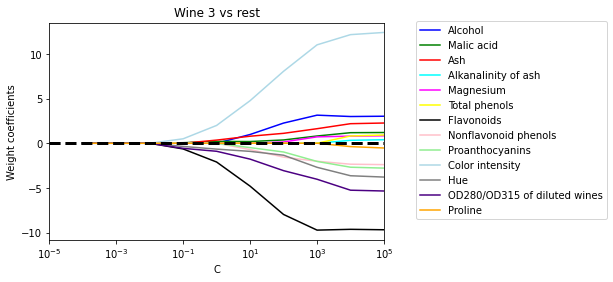

In [ ]:
import matplotlib.pyplot as plt

# create a figure object
fig = plt.figure()

# create an axis object in the figure: Fig 1 in a 1 by 1 grid
ax = plt.subplot(111) 

# colors corresponding to each feature
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

# initialize array to capture weight coefficients for varying C
weights, params = [], []

# consider C = 10**-4 to 10**5. c = -4..5
for c in np.arange(-4, 6).astype(float):
    lr = LogisticRegression(penalty='l1', 
                            C=10**c,
                            solver= 'liblinear', 
                            random_state=0)
    lr.fit(X_train_std, y_train)
    
    # interested in weights corresponding to wine 1 vs wines 2 and 3
    weights.append(lr.coef_[2])                            
    params.append(10**c)

# turn weight and parameter arrays into numpy arrays
weights = np.array(weights)
params = np.array(params)    

print(weights.shape[1])
print(params)    
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column+1],
             color=color)
             
plt.ylabel('Weight coefficients')
plt.xlabel('C')
plt.title('Wine 3 vs rest')
plt.legend(loc='upper left')             
plt.axhline(0, color='black', linestyle='--', linewidth=3)
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.xscale('log')
plt.xlim(10**(-5), 10**5)
#plt.savefig('L1RegularizationWine3.png', bbox_inches='tight')
#plt.close()             
plt.show()

In [ ]:
import numpy as np
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    
    # initializes class - estimator is the ML algorithm of choice, 
    # accuracy_score is the metric to score accuracy by simply comparing the
    # predicted class to the actual class.
    def __init__(self, estimator, k_features, scoring=accuracy_score, 
                 test_size=0.25, random_state=1):
        
        # accuracy scoring function
        self.scoring = scoring     
        
        # clones the estimator for the same parameters without the data
        self.estimator = clone(estimator) 
        
        # number of desired features to reduce the dimensionality to.
        self.k_features = k_features
        
        # spit ratio of test set
        self.test_size = test_size
        
        # seed for random number generator
        self.random_state = random_state            
        
        
    # function to fit the data according to the reduced feature numbers    
    def fit(self, X, y):
        
        # split the data sets into test and train subsets - we need to split
        # the training data rather than our actual test set so that we don't
        # end up using the test data for training.
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        # dimension of training data set - # of features        
        dim = X_train.shape[1]
        
        # range of dim gives the range from 0 to (dim - 1), while tuple
        # generates integers in the range.
        self.indices_ = tuple(range(dim))
        
        # putting the indices in square brackets turns it into a vector.
        self.subsets_ = [self.indices_]
        
        # as defined before, this computes the accuracy of the algorithm for
        # the full feature set.
        score = self._calc_score(X_train, y_train, X_test, y_test, 
                                 self.indices_)                 
        
        # initialize scores_ vector with the initial score.        
        self.scores_ = [score]

        # begin while loop that terminates once the dimension of the feature 
        # space is what we want - k_features.
        while dim > self.k_features:
            
            # intialize scores vectors and indices subsets that is updates as 
            # the feature numbers is reduced.
            scores = []
            subsets = []
            
            # the all (dim - 1) subsets of the feature space of dimension dim
            # are created through combinations from itertools module.
            for p in combinations(self.indices_, r=dim-1):
                
                # compute the prediction accuracy for each index combination.
                score = self._calc_score(X_train, y_train,
                                  X_test, y_test, p)
                                  
                # store the score                                  
                scores.append(score)
                
                # store the index subset
                subsets.append(p)

            # find which position contains the highest score. Note we're not
            # interested in the actual score.
            best = np.argmax(scores)        

            # store the corresponding index as the indices_ variable.                          
            self.indices_ = subsets[best]
            
            # meanwhile, keep track of how the indices evolve with each 
            # decrement of the feature space.
            self.subsets_.append(self.indices_)

            # the dimension has been reduced by 1 via the steps above.                                 
            dim -= 1
            
            # keep track of the scores by adding the score for the best 
            # reduction of the feature space.
            self.scores_.append(scores[best])
            
        # when the while loop is completed, take the last score and store it
        # in the variable k_score_.
        self.k_score_ = self.scores_[-1]
        
        return self
        
    # this function will transform the data set by keeping only the columns
    # with the specified indices. This isn't used anywhere, here but is useful.
    def transform(self, X):
        return X[:, self.indices_]

    # function to find the score of the dataset for specified feature indices.
    # This is used at each step when the feature space has been reduced.
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        
        # fit the data using the learning algorithm of choice.
        self.estimator.fit(X_train[:, indices], y_train) 
        
        # predict the classes.
        y_pred = self.estimator.predict(X_test[:, indices])
        
        # evaluate score
        score = self.scoring(y_test, y_pred)        
        return score

Indices:  [(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12), (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12), (0, 1, 2, 3, 6, 7, 8, 9, 10, 12), (0, 1, 2, 3, 6, 7, 8, 10, 12), (0, 1, 2, 3, 6, 8, 10, 12), (0, 1, 3, 6, 8, 10, 12), (0, 1, 3, 6, 10, 12), (0, 1, 3, 10, 12), (0, 1, 10, 12), (0, 1, 10), (0, 10), (0,)]
Scores:  [0.9354838709677419, 0.967741935483871, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9354838709677419, 0.967741935483871, 0.8709677419354839, 0.8387096774193549]
[((0,), 0.8387096774193549), ((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), 0.9354838709677419), ((0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12), 0.967741935483871), ((0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12), 1.0), ((0, 1, 2, 3, 6, 7, 8, 9, 10, 12), 1.0), ((0, 1, 2, 3, 6, 7, 8, 10, 12), 1.0), ((0, 1, 2, 3, 6, 8, 10, 12), 1.0), ((0, 1, 3, 6, 8, 10, 12), 1.0), ((0, 1, 3, 6, 10, 12), 1.0), ((0, 1, 3, 10, 12), 1.0), ((0, 1, 10), 0.967741935483871), ((0, 1, 10, 12), 0.9354838709677419), ((0, 10), 0.870967741935483

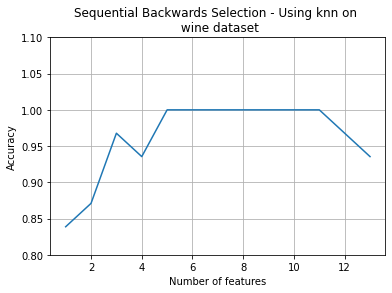

In [ ]:
# Test the sequential backwards algorithm - Raschka uses the knn algorithm.
#from SBS import SBS

# import KNeighborsClassifier from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier

# knn estimator
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# Plot the scores as a function of feature dimension
# Look at the evolution of subsets
print('Indices: ', sbs.subsets_)
print('Scores: ', sbs.scores_)

zp = zip(sbs.subsets_,sbs.scores_)
print(sorted(zp, key=lambda x: x[0]))

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.1)

# when dealing with integers on the x axis, grids really create a visual impact
plt.grid()
plt.title('Sequential Backwards Selection - Using knn on \n wine dataset')
plt.show()

https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-III-Dimensionality-reduction-via-Sequential-feature-selection-Assessing-feature-importance-via-random-forests.php

we have chooosen '8' here, refer the zp printed in last line, there you can see for a high accuracy of 1, the lowest number of features is at '8'

In [ ]:
# We can see that there are 5 features, the smallest amount for which the 
# accuracy is 100%. What are these features?
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])


Index(['Alcohol', 'Malic acid', 'Alkanalinity of ash', 'Hue', 'Proline'], dtype='object')


In [ ]:
# Let us next check how the KNN classifier performs before and after dimension
# reduction. 
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test set accuracy: ', knn.score(X_test_std, y_test))

# After dimensional reduction
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy: ', knn.score(X_train_std[:, k5], y_train))
print('Test set accuracy: ', knn.score(X_test_std[:, k5], y_test))

Training accuracy:  0.9838709677419355
Test set accuracy:  0.9444444444444444
Training accuracy:  0.9596774193548387
Test set accuracy:  0.9629629629629629


# Thus we performed feature extraction with KNN and SBS

In [ ]:
# Assessing feature importance via random forests. There is built in function
# for the RandomForestClassifier of the sklearn.ensemble module.
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
print(feat_labels)
forest = RandomForestClassifier(n_estimators=1000,
                                random_state=0,
                                n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alkanalinity of ash', 'Magnesium',
       'Total phenols', 'Flavonoids', 'Nonflavonoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


 1) Color intensity                0.190583
 2) Proline                        0.159246
 3) Flavonoids                     0.149066
 4) OD280/OD315 of diluted wines   0.137214
 5) Alcohol                        0.103509
 6) Hue                            0.071931
 7) Total phenols                  0.059530
 8) Alkanalinity of ash            0.032480
 9) Malic acid                     0.023645
10) Magnesium                      0.022201
11) Proanthocyanins                0.021967
12) Nonflavonoid phenols           0.015877
13) Ash                            0.012752


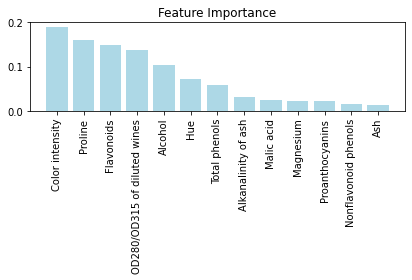

In [ ]:
# note the [::-1] command - in this case it simply flips the order. But it can
# do other things as well. Find out what.
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))
                            
# plot of relative importance of features
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
              importances[indices],
              color='lightblue',
              align='center') 
plt.xticks(range(X_train.shape[1]),
                 feat_labels[indices], rotation=90)       
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()                 
plt.show()                           